### [1] Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### [2] Data Loading

In [2]:
# load the data
df = pd.read_csv("../data/Admission_Predict.csv")

In [3]:
# view the data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# check out info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


There are 9 columns in the dataset, with 400 rows. 

In [6]:
# check missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in the dataset.

### [3] Explaratory Data Analysis(EDA)

Exploratory Data Analysis (EDA) is a crucial step in any data analysis or machine learning project. It involves the initial investigation of the dataset to gain insights, discover patterns, and identify trends or anomalies. EDA plays a significant role in understanding the data, refining data preprocessing steps, and guiding the selection of appropriate machine learning algorithms.

#### [3.1] Univariate Analysis
Univariate analysis focuses on examining individual variables in the dataset. It helps us understand the distribution, central tendency, and spread of each variable. We will perform univariate analysis for numerical and categorical variables separately.

In [8]:
# statistical summary
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
# droping unnecessary columns
df.drop(['Serial No.'] , axis=1, inplace=True)

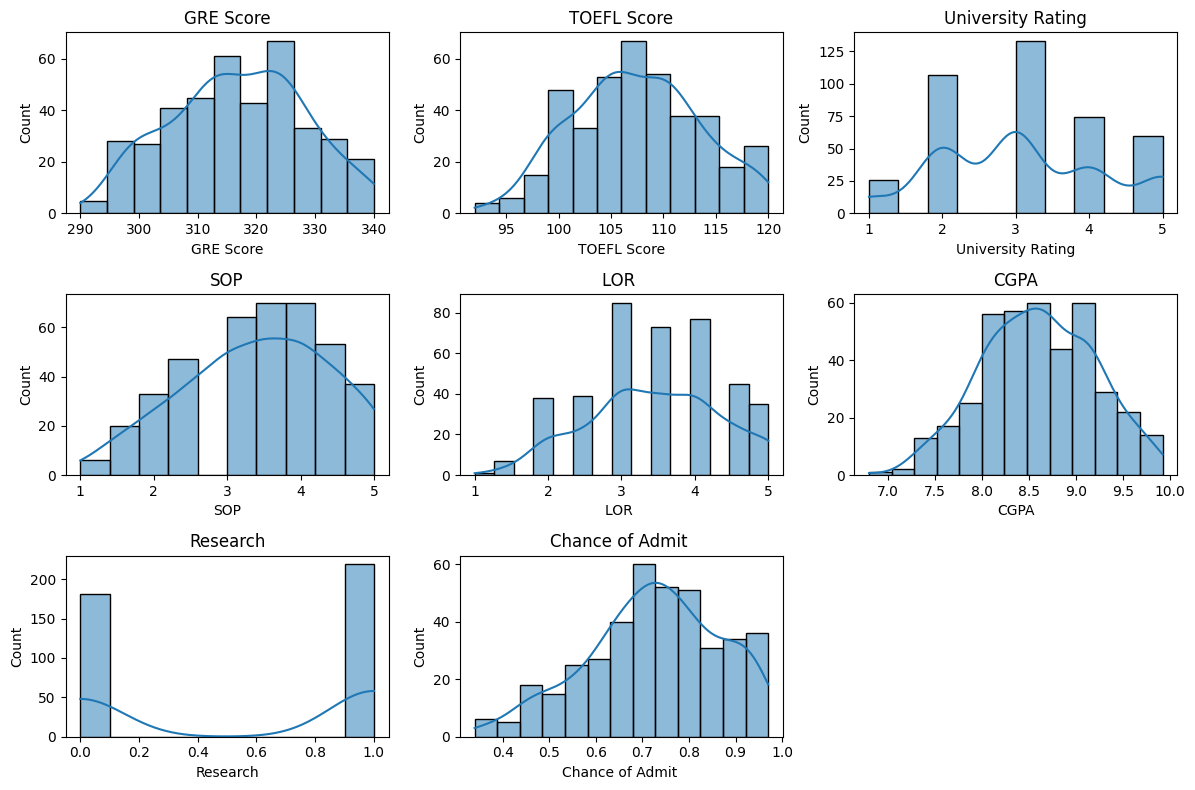

In [15]:
# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

##### Summary from the statistical analysis and Histograms

1. GRE scores - The mean GRE score is 316.8, with a standard deviation of 11.47. The distribution of GRE scores is almost normal, with a slight right skew. The minimum GRE score is 290, and the maximum GRE score is 340.
2. TOEFL scores - The mean TOEFL score is 107.41, with a standard deviation of 6.07. The distribution of TOEFL scores is almost normal, with a slight right skew. The minimum TOEFL score is 93, and the maximum TOEFL score is 120.
3. University Rating - The mean university rating is 3.09, with a standard deviation of 1.14. The distribution of university ratings is almost normal, with a slight left skew. The minimum university rating is 1, and the maximum university rating is 5.
4. Statement of Purpose (SOP) - The mean SOP score is 3.39, with a standard deviation of 0.99. The distribution of SOP scores is almost normal, with a slight left skew. The minimum SOP score is 1, and the maximum SOP score is 5.
5. Letter of Recommendation (LOR) - The mean LOR score is 3.45, with a standard deviation of 0.90. The distribution of LOR scores is almost normal, with a slight left skew. The minimum LOR score is 1, and the maximum LOR score is 5.
6. CGPA - The mean CGPA score is 8.60, with a standard deviation of 0.60. The distribution of CGPA scores is almost normal, with a slight left skew. The minimum CGPA score is 6.80, and the maximum CGPA score is 9.92.
7. Research - The mean research score is 0.55, with a standard deviation of 0.50. The distribution of research scores is almost normal, with a slight right skew. The minimum research score is 0, and the maximum research score is 1.
8. Chance of Admit - The mean chance of admit is 0.72, with a standard deviation of 0.14. The distribution of chance of admit is almost normal, with a slight left skew. The minimum chance of admit is 0.34, and the maximum chance of admit is 0.97.

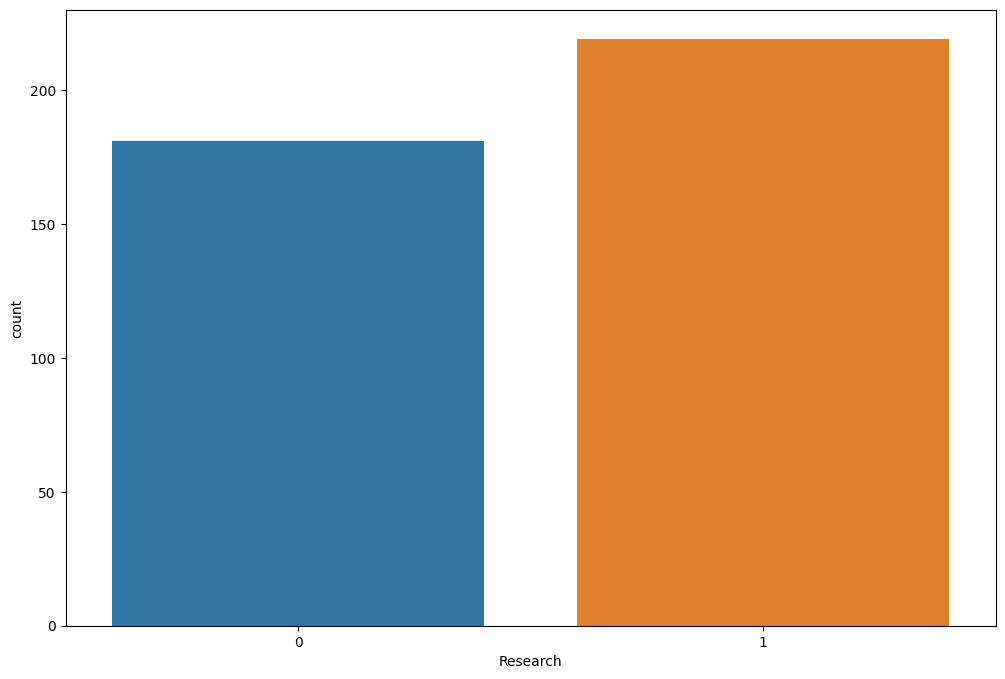

In [17]:
# Distribution of research
plt.figure(figsize=(12, 8))
sns.countplot(x='Research', data=df)
plt.show()